In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770023 entries, 0 to 1770022
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 27.0 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1770018    0.16
1770019    0.16
1770020    0.17
1770021    0.17
1770022    0.17
Name: kWh, Length: 1770023, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1770018    0.16
1770019    0.16
1770020    0.17
1770021    0.17
1770022    0.17
Name: kWh, Length: 1770023, dtype: float64

In [7]:
l=len(conso_data)-1
l

1770022

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770023 entries, 0 to 1770022
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 67.5 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1770018,22037,0.16,22.037,163.361619,43551802299
1770019,21988,0.16,21.988,163.725669,43551824287
1770020,20743,0.17,20.743,173.552524,43551845030
1770021,20468,0.17,20.468,175.884307,43551865498
1770022,21301,0.17,21.301,169.006150,43551886799


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

43551886799000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 20, 19, 251570)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
base

datetime.datetime(2023, 8, 21, 20, 20, 19, 251570)

In [18]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 20:20:41.185570
1         2023-08-21 20:21:03.043570
2         2023-08-21 20:21:25.044570
3         2023-08-21 20:21:46.972570
4         2023-08-21 20:22:08.863570
                     ...            
1770018   2025-01-06 22:03:41.550570
1770019   2025-01-06 22:04:03.538570
1770020   2025-01-06 22:04:24.281570
1770021   2025-01-06 22:04:44.749570
1770022   2025-01-06 22:05:06.050570
Name: dates, Length: 1770023, dtype: datetime64[ns]

## créer les dates

In [19]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:20:41.185570,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:21:03.043570,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:21:25.044570,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:21:46.972570,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:22:08.863570,21/08/23
...,...,...,...,...,...,...,...
1770018,22037,0.16,22.037,163.361619,43551802299,2025-01-06 22:03:41.550570,06/01/25
1770019,21988,0.16,21.988,163.725669,43551824287,2025-01-06 22:04:03.538570,06/01/25
1770020,20743,0.17,20.743,173.552524,43551845030,2025-01-06 22:04:24.281570,06/01/25
1770021,20468,0.17,20.468,175.884307,43551865498,2025-01-06 22:04:44.749570,06/01/25


### save conso_data with dates

In [20]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('06/01/25', 6, 1, 2025)

In [22]:
here = now.strftime('%H:%M:%S')
here

'22:05:34'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4176 entries, 1765847 to 1770022
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   4176 non-null   int64         
 1   kWh        4176 non-null   float64       
 2   sec        4176 non-null   float64       
 3   Wh         4176 non-null   float64       
 4   cumul(ms)  4176 non-null   int64         
 5   dates      4176 non-null   datetime64[ns]
 6   days       4176 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 261.0+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.676, 3.7, 4.222, 3.688, 4.021, 4.627, 3.645, 3.444, 3.506, 3.699, 3.581, 3.979, 4.259, 3.639, 3.626, 3.64, 3.322, 3.373, 4.136, 4.027, 4.02, 4.056, 3.482, 4.333, 3.863, 3.754, 4.174, 4.704, 3.987, 3.214, 3.174, 3.894, 3.78, 3.108, 3.786, 4.16, 3.664, 3.677, 4.663, 4.279, 4.462, 3.825, 3.447, 4.295, 3.875, 3.832, 3.478, 4.035, 3.696, 3.412, 4.156, 3.376, 3.854, 3.86, 3.628, 3.749, 4.281, 3.273, 3.878, 3.082, 2.055, 2.041, 2.372, 4.075, 3.676, 4.351, 3.587, 3.963, 3.757, 3.789, 4.125, 4.056, 3.71, 3.128, 3.766, 3.569, 3.565, 3.713, 3.675, 3.317, 3.833, 3.253, 3.754, 3.606, 4.072, 3.611, 3.433, 3.718, 4.112, 4.335, 3.934, 4.147, 4.279, 3.782, 3.925, 3.819, 3.894, 3.725, 4.046, 4.395, 3.888, 3.508, 3.674, 3.677, 3.346, 3.843, 3.962, 4.136, 3.515, 4.158, 3.595, 3.95, 4.645, 3.627, 3.519, 3.547, 4.046, 3.83, 4.086, 3.971, 3.74, 3.602, 5.1, 3.744, 3.758, 4.227, 4.154, 4.527, 4.427, 4.133, 3.619, 4.429, 4.753, 4.122, 4.775, 4.399, 3.688, 4.096, 3.833, 3.695, 3.482, 3.96, 3.684, 3.705, 3.649

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1770023

In [30]:
period(p=2)

2023-08-22 02:26:54.988570	2023-08-22 09:31:10.608570	7h 4m 15s 	2000


In [31]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.297427
dtype: float64

In [ ]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.504996
dtype: float64

In [ ]:
last=df_grp.iloc[-1]['kWh']
last

4.176

In [ ]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4176 entries, 1765847 to 1770022
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   4176 non-null   int64         
 1   kWh        4176 non-null   float64       
 2   sec        4176 non-null   float64       
 3   Wh         4176 non-null   float64       
 4   cumul(ms)  4176 non-null   int64         
 5   dates      4176 non-null   datetime64[ns]
 6   days       4176 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 261.0+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


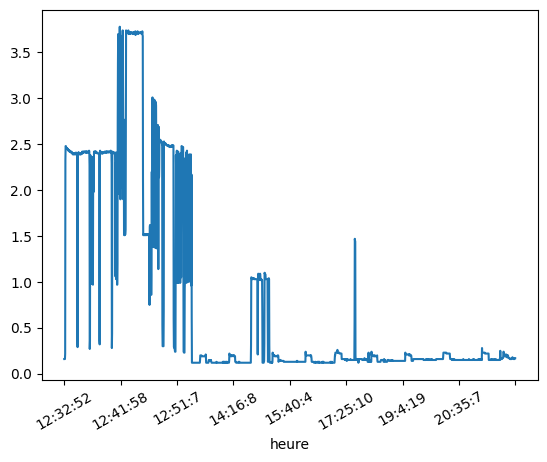

In [36]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:20:41.185570,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:21:03.043570,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:21:25.044570,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:21:46.972570,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:22:08.863570,21/08/23
...,...,...,...,...,...,...,...
1770018,22037,0.16,22.037,163.361619,43551802299,2025-01-06 22:03:41.550570,06/01/25
1770019,21988,0.16,21.988,163.725669,43551824287,2025-01-06 22:04:03.538570,06/01/25
1770020,20743,0.17,20.743,173.552524,43551845030,2025-01-06 22:04:24.281570,06/01/25
1770021,20468,0.17,20.468,175.884307,43551865498,2025-01-06 22:04:44.749570,06/01/25


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:15,22715,0.16,22.715,158.485582,43472395756,2025-01-06 00:00:15.007570,06/01/25
0:0:37,22662,0.16,22.662,158.856235,43472418418,2025-01-06 00:00:37.669570,06/01/25
0:1:0,22589,0.16,22.589,159.369605,43472441007,2025-01-06 00:01:00.258570,06/01/25
0:1:21,21098,0.17,21.098,170.632287,43472462105,2025-01-06 00:01:21.356570,06/01/25
0:1:42,21561,0.17,21.561,166.968137,43472483666,2025-01-06 00:01:42.917570,06/01/25
...,...,...,...,...,...,...,...
22:3:41,22037,0.16,22.037,163.361619,43551802299,2025-01-06 22:03:41.550570,06/01/25
22:4:3,21988,0.16,21.988,163.725669,43551824287,2025-01-06 22:04:03.538570,06/01/25
22:4:24,20743,0.17,20.743,173.552524,43551845030,2025-01-06 22:04:24.281570,06/01/25


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 23/12/24 5.073
Min : 21/12/24 3.009


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1765847,22715,0.16,22.715,158.485582,43472395756,2025-01-06 00:00:15.007570,06/01/25,0:0:15
1765848,22662,0.16,22.662,158.856235,43472418418,2025-01-06 00:00:37.669570,06/01/25,0:0:37
1765849,22589,0.16,22.589,159.369605,43472441007,2025-01-06 00:01:00.258570,06/01/25,0:1:0
1765850,21098,0.17,21.098,170.632287,43472462105,2025-01-06 00:01:21.356570,06/01/25,0:1:21
1765851,21561,0.17,21.561,166.968137,43472483666,2025-01-06 00:01:42.917570,06/01/25,0:1:42
...,...,...,...,...,...,...,...,...
1770018,22037,0.16,22.037,163.361619,43551802299,2025-01-06 22:03:41.550570,06/01/25,22:3:41
1770019,21988,0.16,21.988,163.725669,43551824287,2025-01-06 22:04:03.538570,06/01/25,22:4:3
1770020,20743,0.17,20.743,173.552524,43551845030,2025-01-06 22:04:24.281570,06/01/25,22:4:24
1770021,20468,0.17,20.468,175.884307,43551865498,2025-01-06 22:04:44.749570,06/01/25,22:4:44


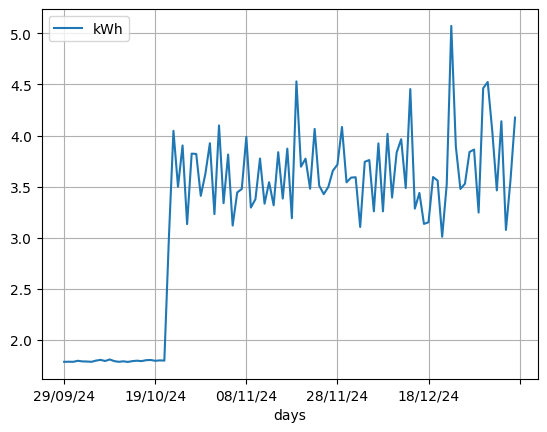

In [40]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2025-01-06 00:00:15.007570	2025-01-06 09:39:19.626570	9h 39m 4s 	1000
2025-01-06 09:39:19.626570	2025-01-06 12:16:41.564570	2h 37m 21s 	2000
2025-01-06 12:16:41.564570	2025-01-06 14:51:11.376570	2h 34m 29s 	3000
2025-01-06 14:51:11.376570	2025-01-06 21:03:44.045570	6h 12m 32s 	4000
2025-01-06 21:03:44.045570	2025-01-06 22:05:06.050570	1h 1m 22s 	176
<class 'pandas.core.frame.DataFrame'>
Index: 4176 entries, 1765847 to 1770022
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   4176 non-null   int64         
 1   kWh        4176 non-null   float64       
 2   sec        4176 non-null   float64       
 3   Wh         4176 non-null   float64       
 4   cumul(ms)  4176 non-null   int64         
 5   dates      4176 non-null   datetime64[ns]
 6   days       4176 non-null   object        
 7   heure      4176 non-null   object        
 8   hours      4176 non-null   object        
dtypes: datetime64[ns

('06/01/25', <Axes: xlabel='hours'>)

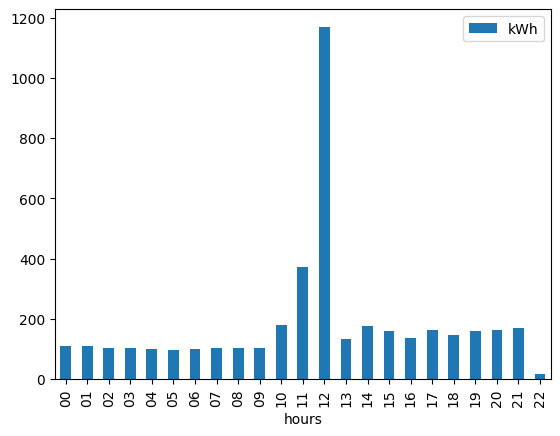

In [41]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.676
22/08/23,3.700
23/08/23,4.222
24/08/23,3.688
25/08/23,4.021
...,...
02/01/25,3.463
03/01/25,4.140
04/01/25,3.076


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


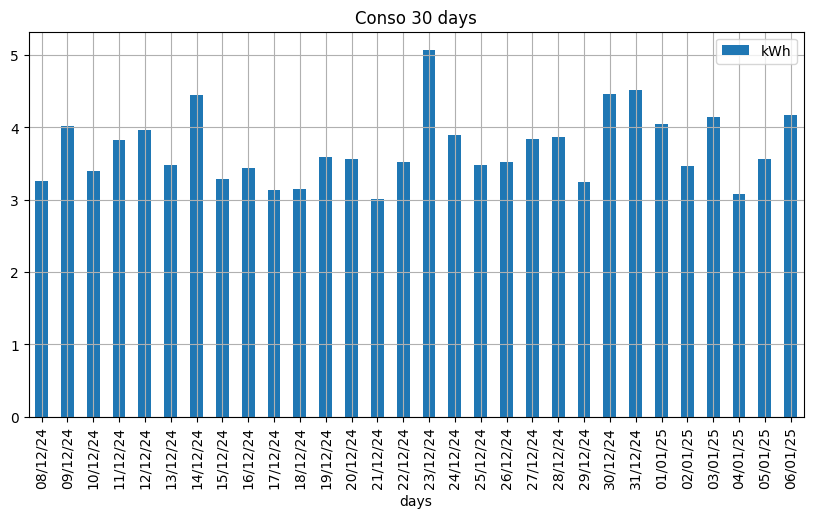

In [44]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


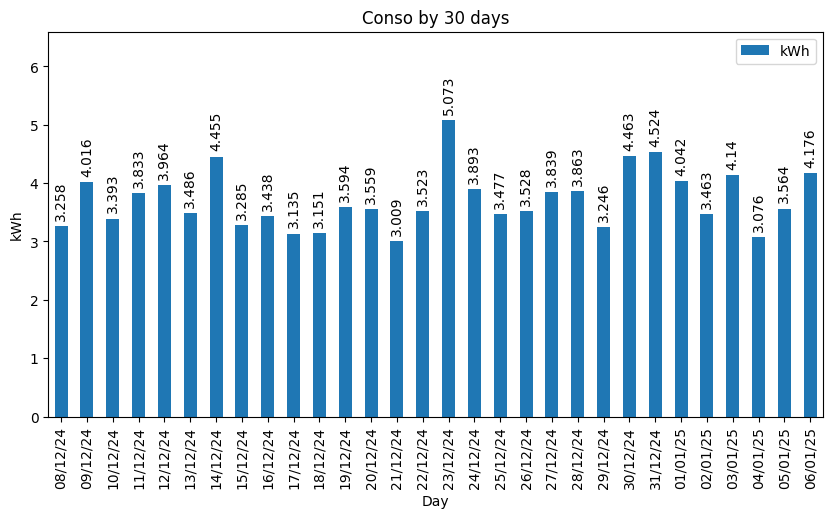

In [45]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
08/12/24    3.258
09/12/24    4.016
10/12/24    3.393
11/12/24    3.833
12/12/24    3.964
13/12/24    3.486
14/12/24    4.455
15/12/24    3.285
16/12/24    3.438
17/12/24    3.135
18/12/24    3.151
19/12/24    3.594
20/12/24    3.559
21/12/24    3.009
22/12/24    3.523
23/12/24    5.073
24/12/24    3.893
25/12/24    3.477
26/12/24    3.528
27/12/24    3.839
28/12/24    3.863
29/12/24    3.246
30/12/24    4.463
31/12/24    4.524
01/01/25    4.042
02/01/25    3.463
03/01/25    4.140
04/01/25    3.076
05/01/25    3.564
06/01/25    4.176
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['08/12/24', '09/12/24', '10/12/24', '11/12/24', '12/12/24', '13/12/24',
       '14/12/24', '15/12/24', '16/12/24', '17/12/24', '18/12/24', '19/12/24',
       '20/12/24', '21/12/24', '22/12/24', '23/12/24', '24/12/24', '25/12/24',
       '26/12/24', '27/12/24', '28/12/24', '29/12/24', '30/12/24', '31/12/24',
       '01/01/25', '02/01/25', '03/01/25', '04/01/25', '05/01/25', '06/01/25'],
      dtype='object', name='days')

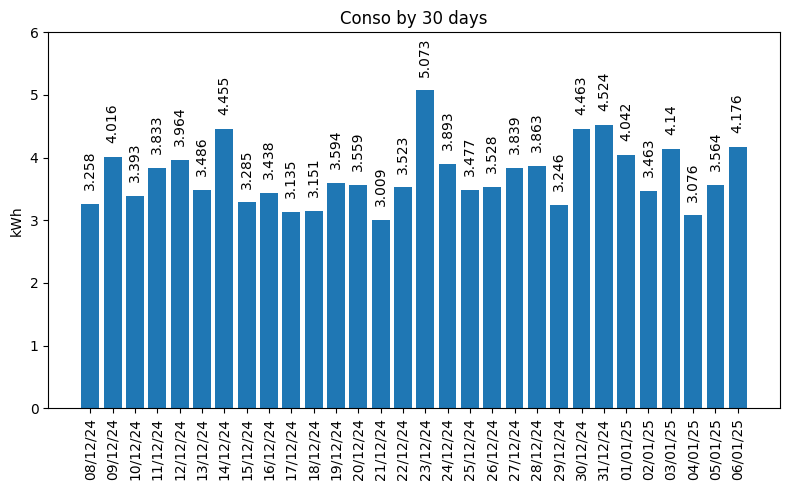

In [48]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

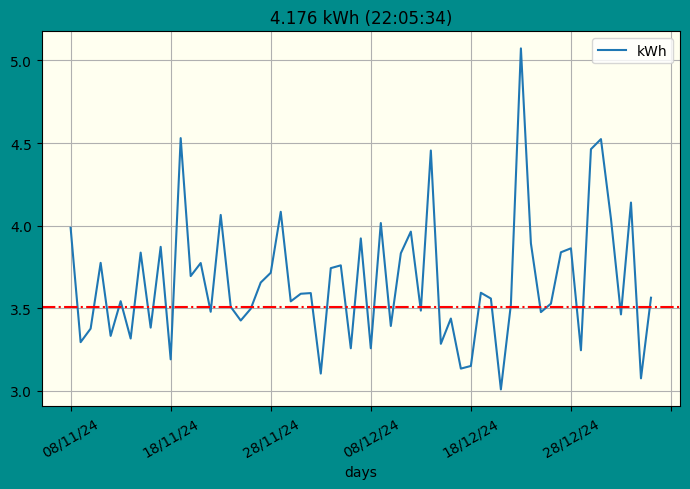

In [50]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

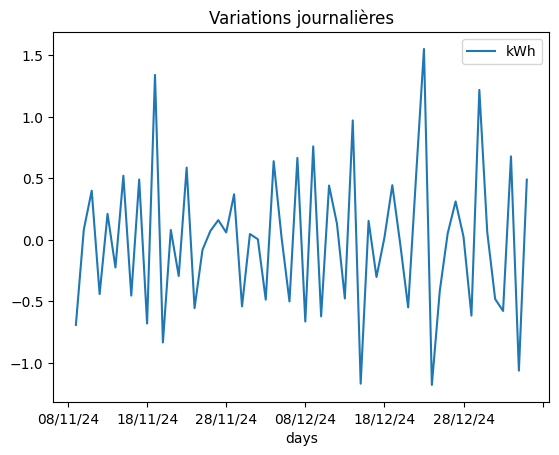

In [51]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [52]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:20:41.185570,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:21:03.043570,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:21:25.044570,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:21:46.972570,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:22:08.863570,21/08/23,20
...,...,...,...,...,...,...,...,...
1770018,22037,0.16,22.037,163.361619,43551802299,2025-01-06 22:03:41.550570,06/01/25,22
1770019,21988,0.16,21.988,163.725669,43551824287,2025-01-06 22:04:03.538570,06/01/25,22
1770020,20743,0.17,20.743,173.552524,43551845030,2025-01-06 22:04:24.281570,06/01/25,22
1770021,20468,0.17,20.468,175.884307,43551865498,2025-01-06 22:04:44.749570,06/01/25,22


In [53]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [54]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [56]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,676
22/08/23,3700
23/08/23,4222
24/08/23,3688
25/08/23,4021
...,...
02/01/25,3463
03/01/25,4140
04/01/25,3076


In [ ]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:20:41.185570,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:21:03.043570,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:21:25.044570,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:21:46.972570,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:22:08.863570,21/08/23,20
...,...,...,...,...,...,...,...,...
1770018,22037,0.16,22.037,163.361619,43551802299,2025-01-06 22:03:41.550570,06/01/25,22
1770019,21988,0.16,21.988,163.725669,43551824287,2025-01-06 22:04:03.538570,06/01/25,22
1770020,20743,0.17,20.743,173.552524,43551845030,2025-01-06 22:04:24.281570,06/01/25,22
1770021,20468,0.17,20.468,175.884307,43551865498,2025-01-06 22:04:44.749570,06/01/25,22


In [59]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 20    0        21/08/23    20  0.16
               1        21/08/23    20  0.16
               2        21/08/23    20  0.16
               3        21/08/23    20  0.16
               4        21/08/23    20  0.16
...                          ...   ...   ...
06/01/25 22    1770018  06/01/25    22  0.16
               1770019  06/01/25    22  0.16
               1770020  06/01/25    22  0.17
               1770021  06/01/25    22  0.17
               1770022  06/01/25    22  0.17

[1770023 rows x 3 columns]

In [60]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [61]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/2

In [62]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,676,676
22/08/23,3700,3700
23/08/23,4222,4222
24/08/23,3688,3688
25/08/23,4021,4021
...,...,...
02/01/25,3463,3463
03/01/25,4140,4140
04/01/25,3076,3076


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        676
22/08/23       4376
23/08/23       8598
24/08/23      12286
25/08/23      16307
             ...   
02/01/25    1755067
03/01/25    1759207
04/01/25    1762283
05/01/25    1765847
06/01/25    1770023
Name: kWh, Length: 505, dtype: int64

In [64]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 20     123
         21     280
         22     143
         23     130
22/08/23 00     130
...             ...
06/01/25 18     147
         19     160
         20     164
         21     171
         22      15

[12099 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  20           123
          21           403
          22           546
          23           676
22/08/23  00           806
                    ...   
06/01/25  18       1769513
          19       1769673
          20       1769837
          21       1770008
          22       1770023
Name: kWh, Length: 12099, dtype: int64

In [66]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 20     123     123    NaN
         21     280     403  157.0
         22     143     546 -137.0
         23     130     676  -13.0
22/08/23 00     130     130    NaN
...             ...     ...    ...
06/01/25 18     147    3666  -16.0
         19     160    3826   13.0
         20     164    3990    4.0
         21     171    4161    7.0
         22      15    4176 -156.0

[12099 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('06/01/25',
         kWh  cumsum    diff
 hours                      
 00      111     111     NaN
 01      108     219    -3.0
 02      104     323    -4.0
 03      102     425    -2.0
 04      100     525    -2.0
 05       97     622    -3.0
 06      101     723     4.0
 07      102     825     1.0
 08      103     928     1.0
 09      103    1031     0.0
 10      180    1211    77.0
 11      371    1582   191.0
 12     1170    2752   799.0
 13      134    2886 -1036.0
 14      175    3061    41.0
 15      159    3220   -16.0
 16      136    3356   -23.0
 17      163    3519    27.0
 18      147    3666   -16.0
 19      160    3826    13.0
 20      164    3990     4.0
 21      171    4161     7.0
 22       15    4176  -156.0)

Text(0.5, 1.0, 'Cumul journalier')

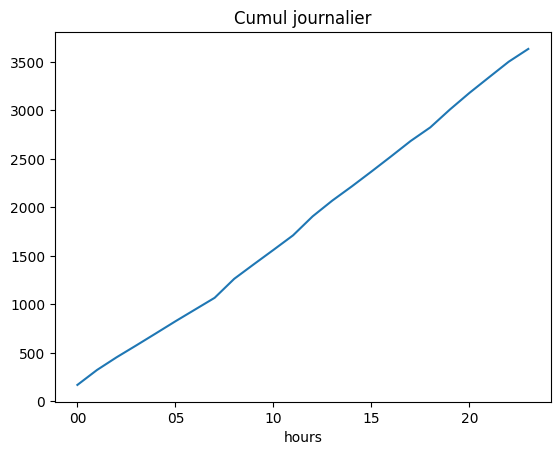

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

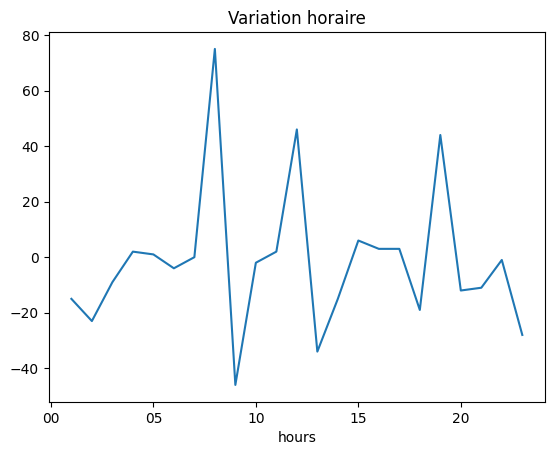

In [69]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

505

In [71]:
df_grp.tail(n)['kWh'].describe()


count    505.000000
mean       3.504996
std        0.685024
min        0.676000
25%        3.342000
50%        3.622000
75%        3.879000
max        5.100000
Name: kWh, dtype: float64

In [72]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '505 days')

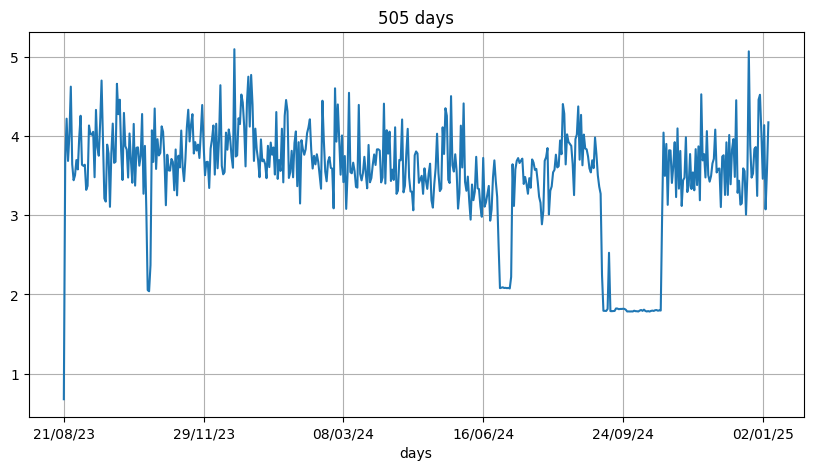

In [73]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

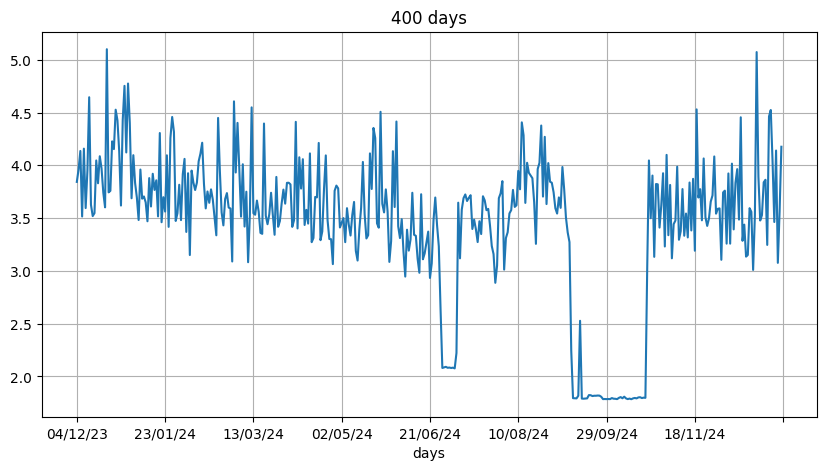

In [74]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [75]:
df_grp['kWh']

days
21/08/23    0.676
22/08/23    3.700
23/08/23    4.222
24/08/23    3.688
25/08/23    4.021
            ...  
02/01/25    3.463
03/01/25    4.140
04/01/25    3.076
05/01/25    3.564
06/01/25    4.176
Name: kWh, Length: 505, dtype: float64

In [76]:
df_grp.describe()

,kWh
count,505.000000
mean,3.504996
std,0.685024
min,0.676000
25%,3.342000
50%,3.622000
75%,3.879000
max,5.100000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

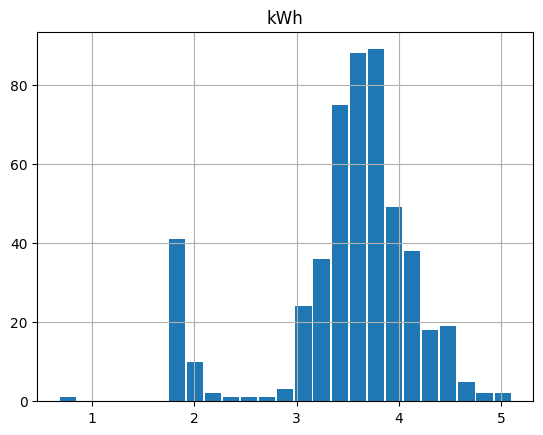

In [77]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [78]:
df_grp.tail(span)['kWh']

days
04/12/23    3.843
05/12/23    3.962
06/12/23    4.136
07/12/23    3.515
08/12/23    4.158
            ...  
02/01/25    3.463
03/01/25    4.140
04/01/25    3.076
05/01/25    3.564
06/01/25    4.176
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [ ]:
day

'06/01/25'

In [ ]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,111,111,NaN
01,108,219,-3.0
02,104,323,-4.0
03,102,425,-2.0
04,100,525,-2.0
05,97,622,-3.0
06,101,723,4.0
07,102,825,1.0
08,103,928,1.0


In [ ]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


23

In [82]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 24)

In [83]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [84]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [85]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
Name: days, dtype: float64

In [86]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [87]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 00 to 22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     23 non-null     int64  
 1   cumsum  23 non-null     int64  
 2   diff    22 non-null     float64
 3   days    23 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 920.0+ bytes


In [88]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
Name: days, dtype: float64

In [89]:
day

'06/01/25'

In [90]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,111,111,NaN,1.0
01,108,219,-3.0,2.0
02,104,323,-4.0,3.0
03,102,425,-2.0,4.0
04,100,525,-2.0,5.0
05,97,622,-3.0,6.0
06,101,723,4.0,7.0
07,102,825,1.0,8.0
08,103,928,1.0,9.0


Text(0.5, 1.0, '06/01/25')

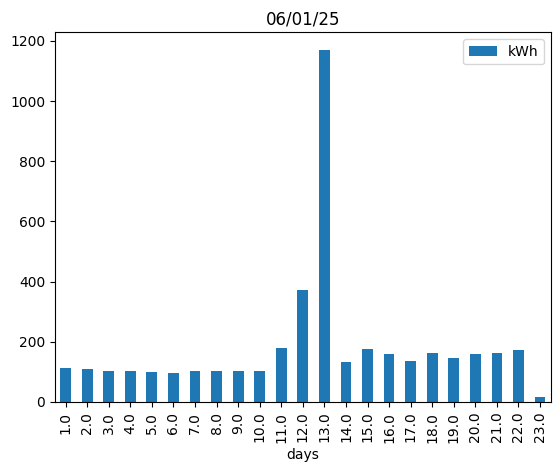

In [91]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [92]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype='object', name='hours')

# Conso du jour


In [93]:
groupedbyhour.count()

,kWh
hours,
00,111
01,108
02,104
03,102
04,100
05,97
06,101
07,102
08,103


In [94]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    165
01    167
02    152
03    169
04    153
05    160
06    144
07    115
08    130
09    126
10    119
11    131
12    114
13    132
14    202
15    140
16    156
17    979
18    203
19    280
20    302
21    310
22    317
23    234
Name: kWh, dtype: int64

In [95]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

322.262

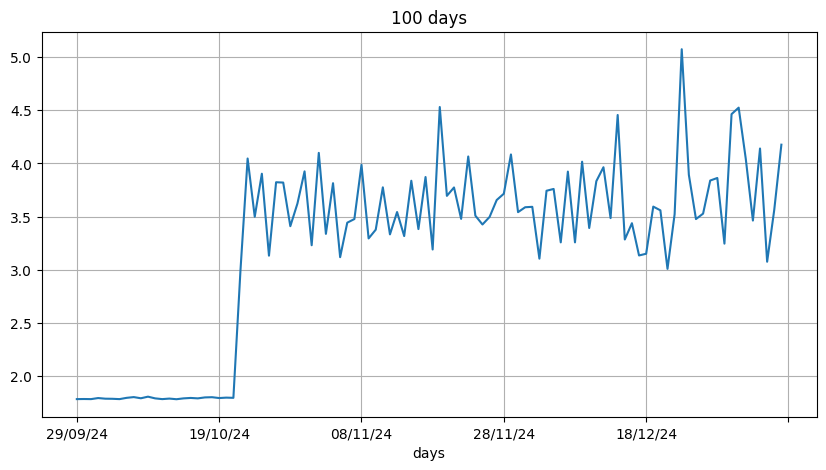

In [96]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [97]:
df_grp.tail(1)

,kWh
days,
06/01/25,4.176


In [98]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

4.176

In [99]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

71.00195240974426


# Today

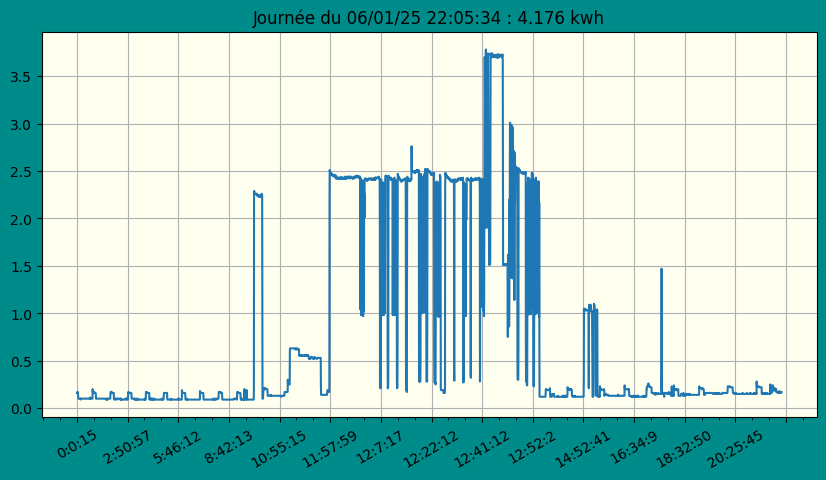

In [100]:
show(today,bgcolor='ivory')

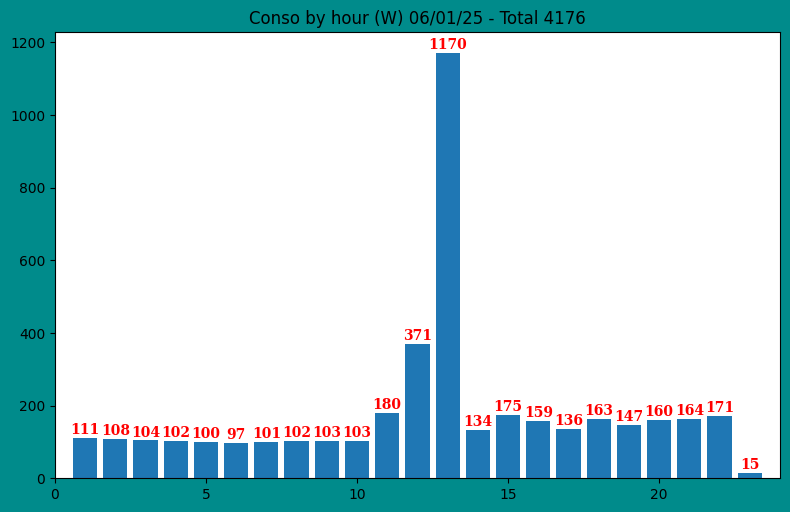

In [101]:
conso_by_hour(today)

In [102]:
day = '03/01/25'

('03/01/25', None)

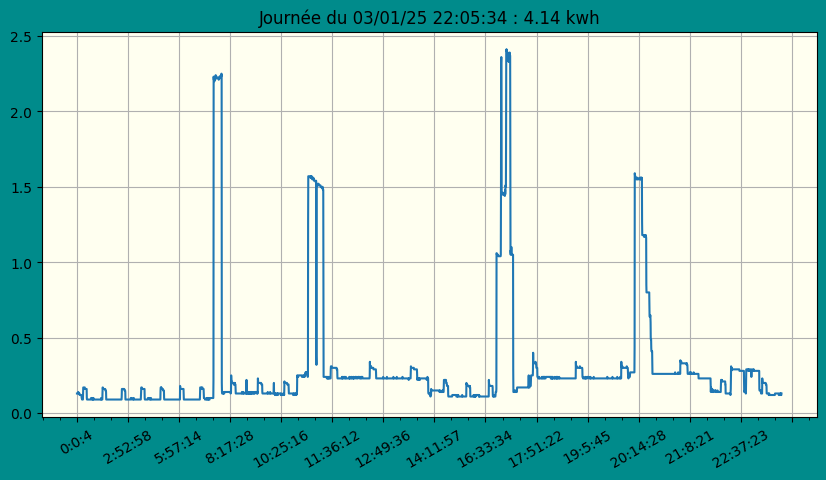

In [103]:
day, show(day,bgcolor='ivory')

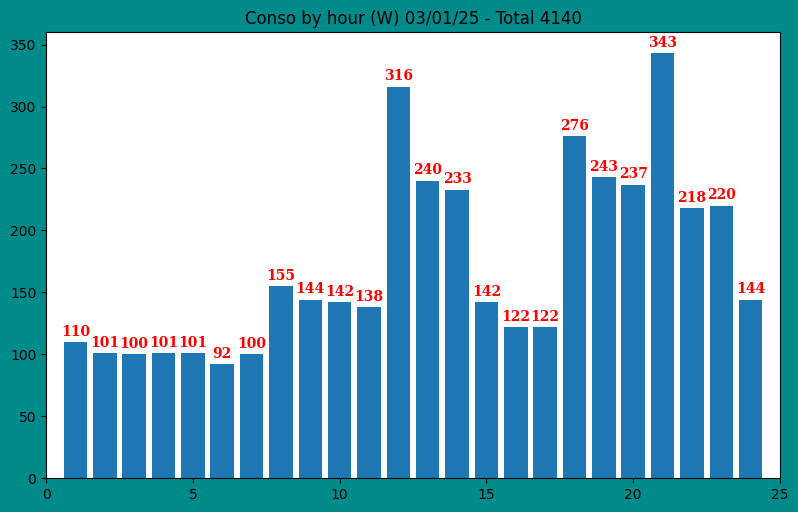

In [104]:
conso_by_hour(day)

In [105]:
maxday

'21/12/23'

('21/12/23', None)

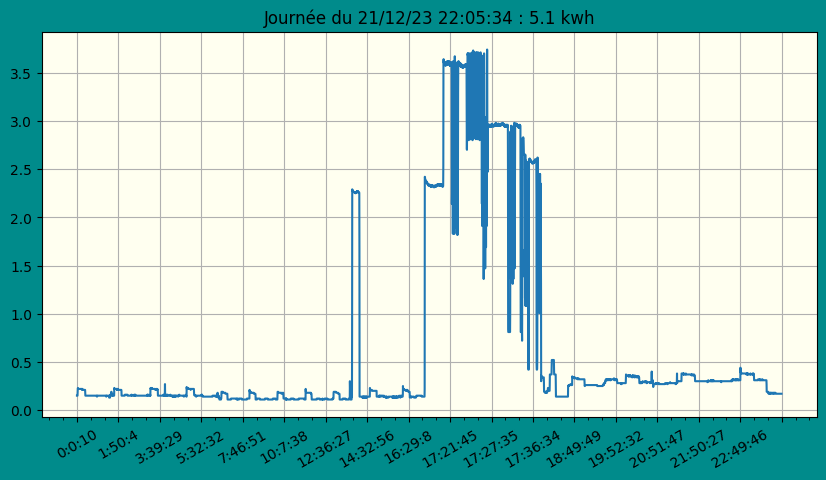

In [106]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

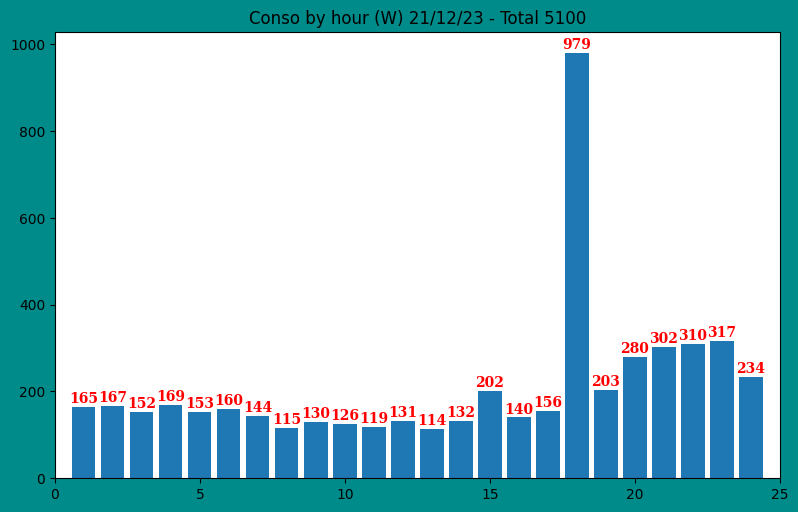

In [107]:
conso_by_hour(day)

In [108]:
sum(data)

5100

In [109]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,111,111,NaN,1.0
01,108,219,-3.0,2.0
02,104,323,-4.0,3.0
03,102,425,-2.0,4.0
04,100,525,-2.0,5.0
05,97,622,-3.0,6.0
06,101,723,4.0,7.0
07,102,825,1.0,8.0
08,103,928,1.0,9.0


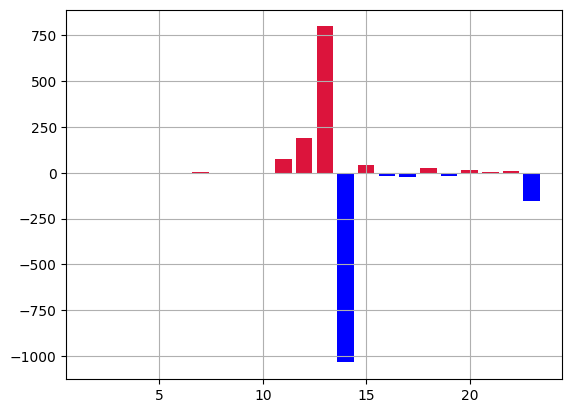

In [110]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [111]:
data

hours
00    165
01    167
02    152
03    169
04    153
05    160
06    144
07    115
08    130
09    126
10    119
11    131
12    114
13    132
14    202
15    140
16    156
17    979
18    203
19    280
20    302
21    310
22    317
23    234
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

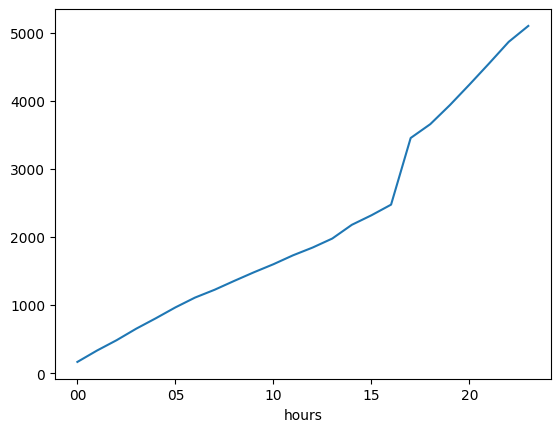

In [112]:
data.cumsum().plot()


<Axes: xlabel='hours'>

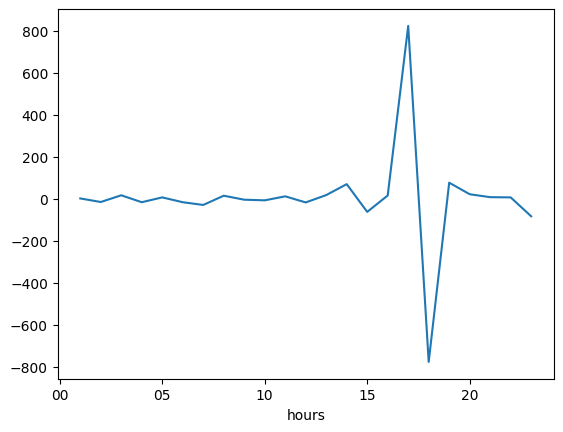

In [113]:
# evolution par heure
data.diff().plot()

In [114]:
data.diff().describe()

count     23.00000
mean       3.00000
std      243.52338
min     -776.00000
25%      -16.00000
50%        7.00000
75%       16.50000
max      823.00000
Name: kWh, dtype: float64

<Axes: >

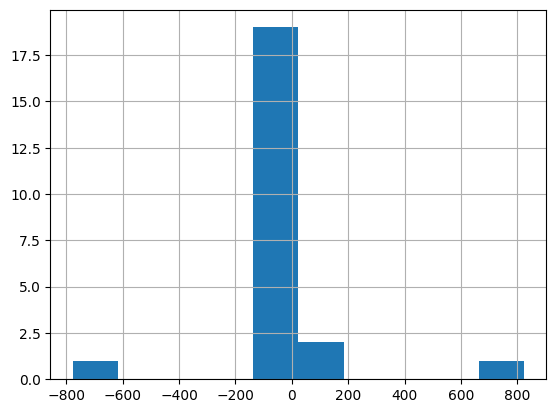

In [115]:
data.diff().hist()

# Test sauvegarde

In [ ]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.git_old',
 '.ipynb_checkpoints',
 '1row.flf',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 

In [117]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [118]:
#conso_byhour(day)

In [119]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


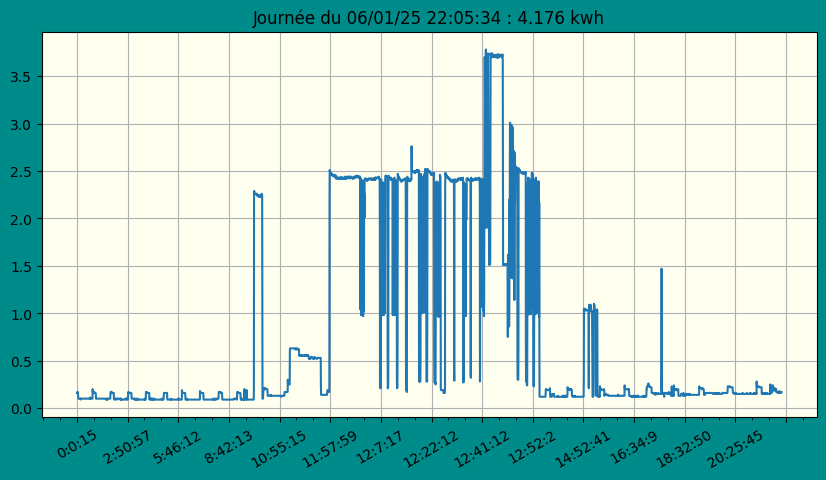

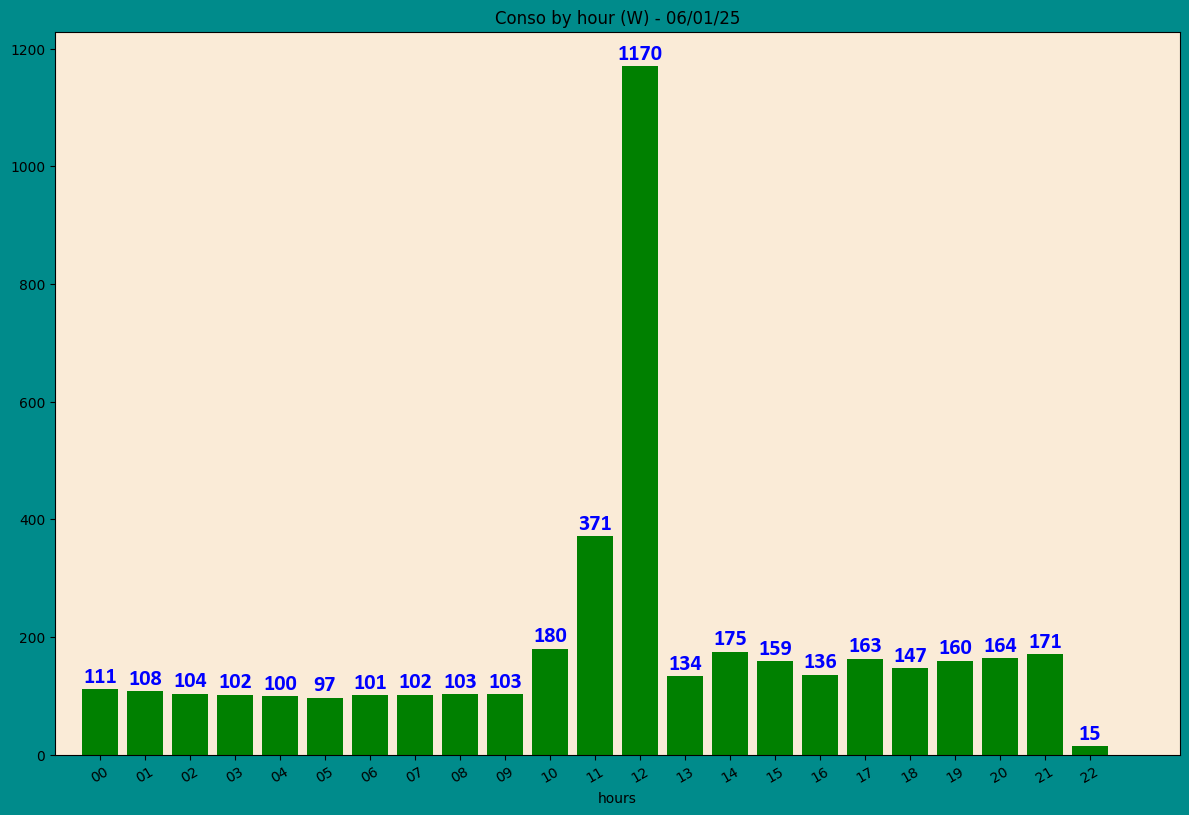

In [120]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [121]:
month.describe()


count    30.000000
mean      3.707100
std       0.485364
min       3.009000
25%       3.404250
50%       3.561500
75%       3.953750
max       5.073000
Name: kWh, dtype: float64

<Axes: >

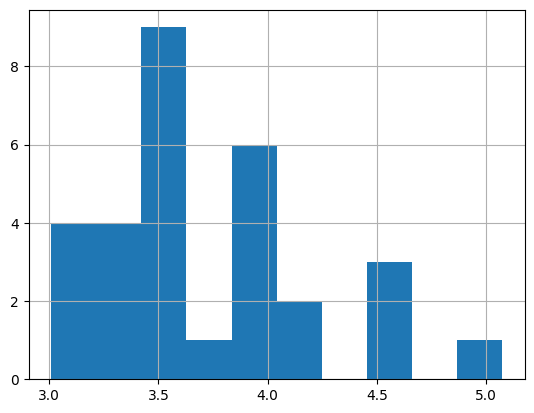

In [122]:
month.hist()

<Axes: xlabel='days'>

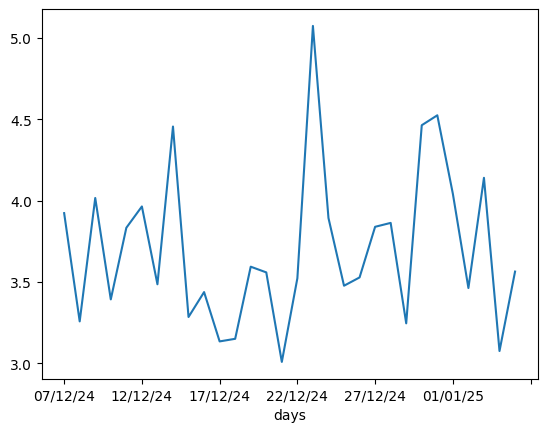

In [123]:
month.plot()

In [124]:
# date with max conso in 1 month
month.idxmax()

'23/12/24'

In [125]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'23/12/24'

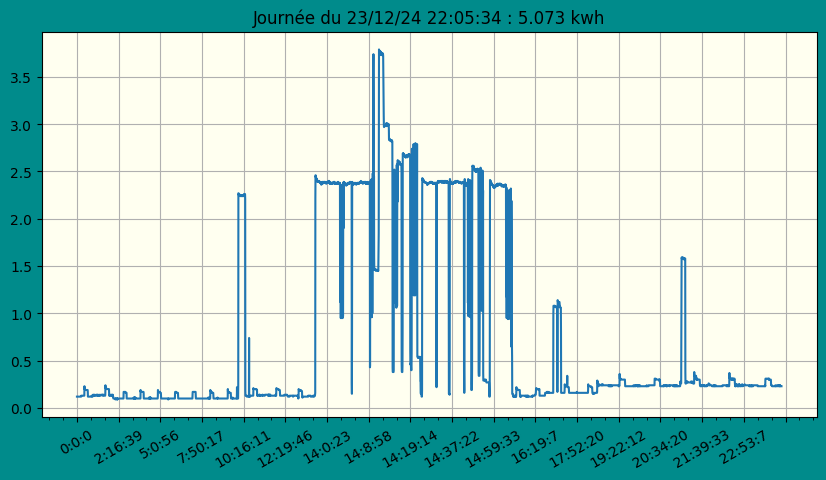

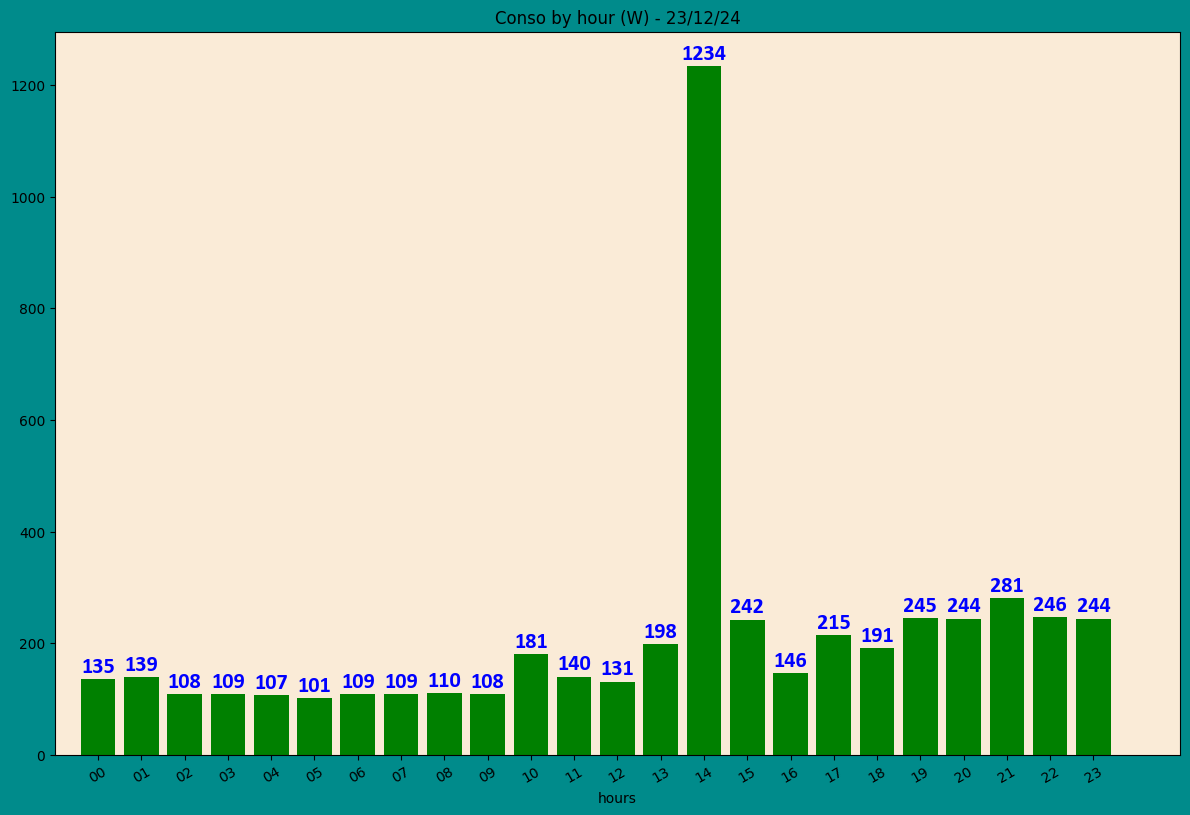

In [126]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [127]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 20     123     123    NaN   NaN
         21     280     403  157.0   NaN
         22     143     546 -137.0   NaN
         23     130     676  -13.0   NaN
22/08/23 00     130     130    NaN   NaN
...             ...     ...    ...   ...
06/01/25 18     147    3666  -16.0  19.0
         19     160    3826   13.0  20.0
         20     164    3990    4.0  21.0
         21     171    4161    7.0  22.0
         22      15    4176 -156.0  23.0

[12099 rows x 4 columns]

In [128]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,135,135,NaN,NaN
01,139,274,4.0,NaN
02,108,382,-31.0,NaN
03,109,491,1.0,NaN
04,107,598,-2.0,NaN
05,101,699,-6.0,NaN
06,109,808,8.0,NaN
07,109,917,0.0,NaN
08,110,1027,1.0,NaN


In [129]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

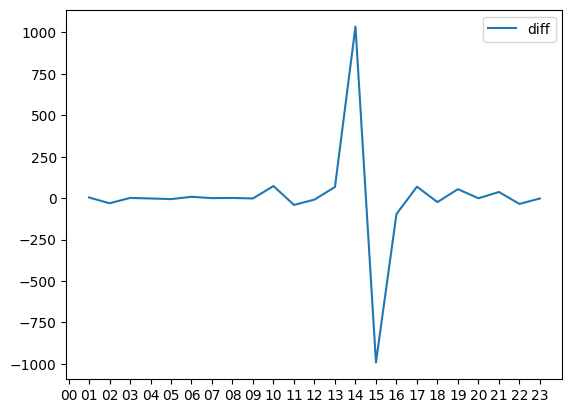

In [130]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

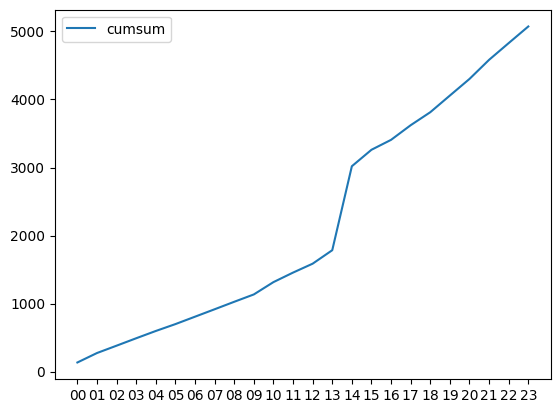

In [131]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [132]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB